## Purpose: CombiModel example

Use Case:
Fit a line multiplet in spectral data.

Demonstration: 
    1. CombiModel
    2. Parameter fit using LevenbergMarquardtFitter
    3. Parameter fit using (Annealing) AmoebaFitter

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import GaussModel
from BayesicFitting import CombiModel
from BayesicFitting import PolynomialModel
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import AmoebaFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import formatter_init as init
import matplotlib.pyplot as plt


# inititialise the formatter to get a nicer layout
init( linelength=60, indent=13 )

define some constants

In [2]:
N = 201
x0 = 0.1            # x position of gaussian
a0 = 10.0           # amplitude of gaussian
s0 = 0.1            # width   
b0 = 1.0            # offset of background
b1 = 0.2            # slope of background
   
a1 = 0.7 * a0       
a2 = 1.2 * a0
a3 = 0.4 * a0
x1 = x0 + 1.4
x2 = x0 + 2.7   
x3 = x0 + 3.3

sig = 0.2

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 5.0, N, dtype=float )
ym = a0 * numpy.exp( -0.5 * numpy.square( (x - x0) / s0 ) )
ym += a1 * numpy.exp( -0.5 * numpy.square( (x - x1) / s0 ) )
ym += a2 * numpy.exp( -0.5 * numpy.square( (x - x2) / s0 ) )
ym += a3 * numpy.exp( -0.5 * numpy.square( (x - x3) / s0 ) )
ym += b0 + b1 * x

numpy.random.seed( 1308 )
y = ym + sig * numpy.random.randn( N )


Define the model as a combination of 4 GaussModels, of which the centers are connected additively:
    * center_0 = param_1
    * center_1 = param_1 + 1.4 
    * center_2 = param_1 + 2.7
    * center_3 = param_1 + 3.3
The widths are connected multiplicatively
    * width_[:] = param_2 * 1
All lines have the same width. Alternatively, the same could be achieved with an additive connection: addCombi={2,[0,0,0,0]}.

In [4]:
gm = GaussModel()
com = CombiModel( gm, 4, addCombi={1:[0,1.4,2.7,3.3]}, 
                  mulCombi={2:[1,1,1,1]} )
com.addModel( PolynomialModel( 1 ) )

print( com )
print( com.parameters )

Combi of 4 times Gauss +
Polynomial: f( x:p ) = p_6 + p_7 * x
[1. 0. 1. 1. 1. 1. 0. 0.]


define a fitter: LevenbergMarquardtFitter

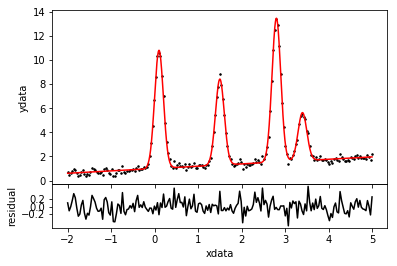

Parameters : [    9.789    0.100    0.101    7.133   11.924
                  3.984    0.991    0.194]
StDevs     : [    0.089    0.001    0.001    0.086    0.091
                  0.086    0.018    0.007]
Chisq      :     6.503
Scale      :     0.184
Evidence   :  -105.659


In [5]:
fitter = LevenbergMarquardtFitter( x, com )
 
# find the parameters
param = fitter.fit( y, plot=True )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )


Try the AmoebaFitter with a temperature setting to use the annealing feature.

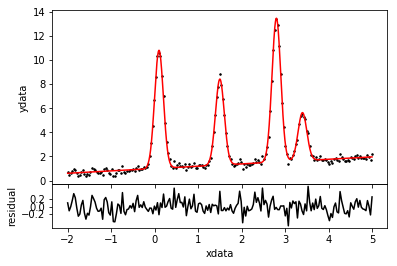

Parameters : [    9.789    0.100    0.101    7.133   11.924
                  3.984    0.991    0.194]
StDevs     : [    0.089    0.001    0.001    0.086    0.091
                  0.086    0.018    0.007]
Chisq      :     6.503
Scale      :     0.184
Evidence   :  -105.659


In [6]:
ftr = AmoebaFitter( x, com )
param = ftr.fit( y, temp=2.0, tolerance=0.01, plot=True )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )


Exercise: Change the initial parameter of the model until the fitters fail to give the right answer.